# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Hafiz caniago
- Email: hafizcode02@gmail.com
- Id Dicoding: hafizcaniago

# Business Understanding


Jaya Jaya Institut mengalami masalah tingginya angka dropout atau putus studi. Hal ini berdampak buruk terhadap reputasi institusi. Tujuan dari proyek ini adalah untuk membangun sistem prediktif menggunakan machine learning agar dapat mengidentifikasi siswa yang berpotensi dropout sejak dini. Dengan demikian, pihak institusi dapat memberikan perhatian dan intervensi khusus sebelum siswa memutuskan keluar dari institusi.

Objective: Memprediksi kemungkinan dropout seorang siswa berdasarkan data historis performa dan latar belakangnya.

# Persiapan

## Menyiapkan library yang dibutuhkan

In [43]:
import pandas as pd
import joblib
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Menyiapkan data yang akan diguankan

In [44]:
# Load data ke dataframe (csv punya separator ';')
df = pd.read_csv('data.csv', sep=';')
df.head(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

Dataset yang digunakan memuat informasi dari berbagai aspek siswa seperti:

Status ekonomi dan latar belakang orang tua
Status kehadiran dan nilai akademik
Faktor eksternal seperti inflasi, pengangguran, dan GDP
Target kolom adalah Status yang terdiri dari dua nilai: Dropout dan Graduate.

In [45]:
# Lihat Informasi Data
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

# Data Preparation / Preprocessing

In [46]:
# Cek missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                 

**Menangani Outliers pada Data**

In [47]:
df.describe(include='all')

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


<Axes: xlabel='Curricular_units_2nd_sem_enrolled'>

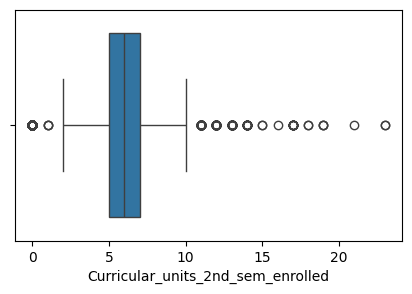

In [48]:
plt.figure(figsize=(5,3))
sns.boxplot(x=df['Curricular_units_2nd_sem_enrolled'])

<Axes: xlabel='Curricular_units_2nd_sem_evaluations'>

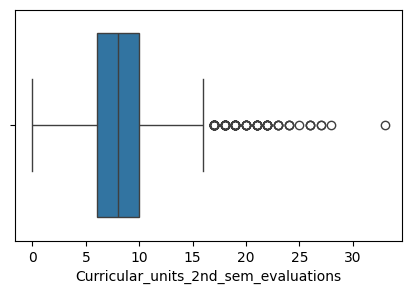

In [49]:
plt.figure(figsize=(5,3))
sns.boxplot(x=df['Curricular_units_2nd_sem_evaluations'])

<Axes: xlabel='Curricular_units_2nd_sem_approved'>

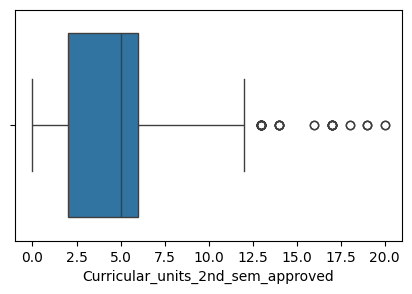

In [50]:
plt.figure(figsize=(5,3))
sns.boxplot(x=df['Curricular_units_2nd_sem_approved'])

In [51]:
# menghapus outlier
outlier_columns = ['Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved']

Q1 = df[outlier_columns].quantile(0.25)
Q3 = df[outlier_columns].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

new_df = df[~((df[outlier_columns] < lower_bound) | (df[outlier_columns] > upper_bound)).any(axis=1)]

In [52]:
new_df.shape

(4004, 37)

<Axes: xlabel='Curricular_units_2nd_sem_enrolled'>

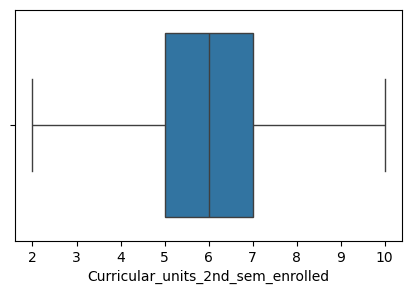

In [53]:
# cek outlier fitur Curricular_units_2nd_sem_enrolled
plt.figure(figsize=(5,3))
sns.boxplot(x=new_df['Curricular_units_2nd_sem_enrolled'])

In [59]:
# Mengubah Target Fitur dari Kategorikal jadi Boolean
new_df['Status'] = new_df['Status'].map({'Graduate': 1, 'Dropout': 0, 'Enrolled': 1}).fillna(new_df['Status'])

# Exploratory Data Analysis

Disini saya melakukan eksplorasi dan visualisasi terhadap beberapa data, yaitu berupa visualisasi jumlah kategori target yang ada, analisis hubungan performa akademik dengan status dropout, dan korelasi fitur numerik

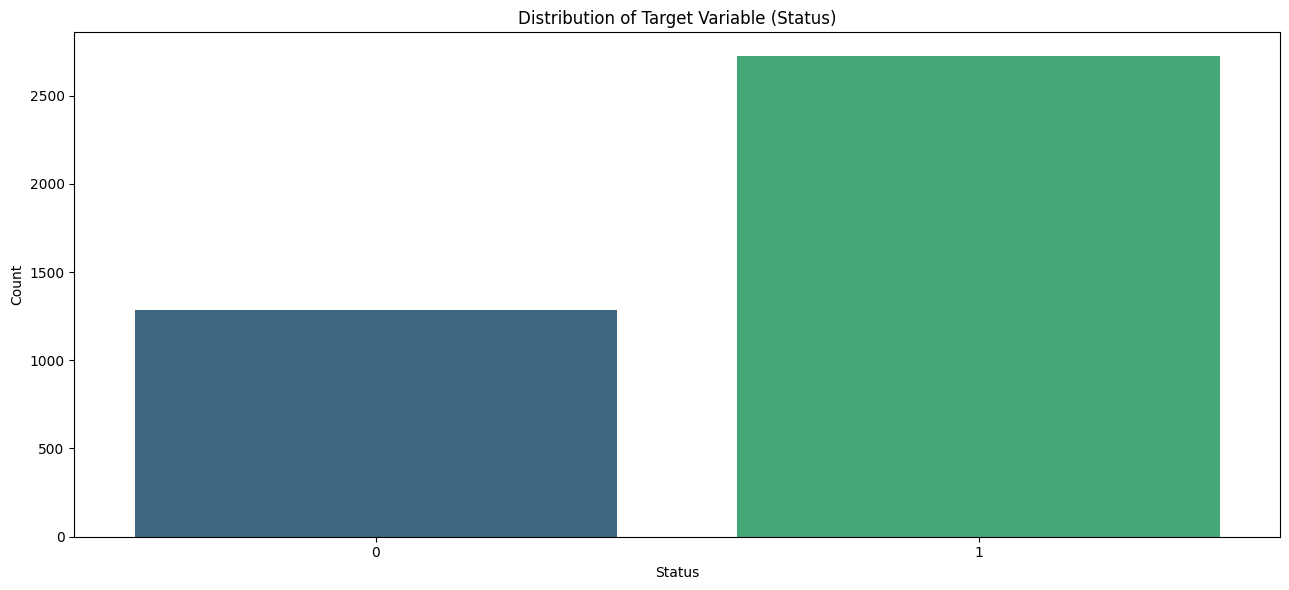

In [60]:
# Ambil nilai unik untuk fitur kategorikal
categorical_features = new_df.select_dtypes(include=['object']).columns

# Cek distribusi target
target_counts = new_df['Status'].value_counts()

# Visualisasi target distribusi
plt.figure(figsize=(13, 6))
ax = sns.countplot(x='Status', data=new_df, palette='viridis')
plt.title('Distribution of Target Variable (Status)')
plt.xlabel('Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

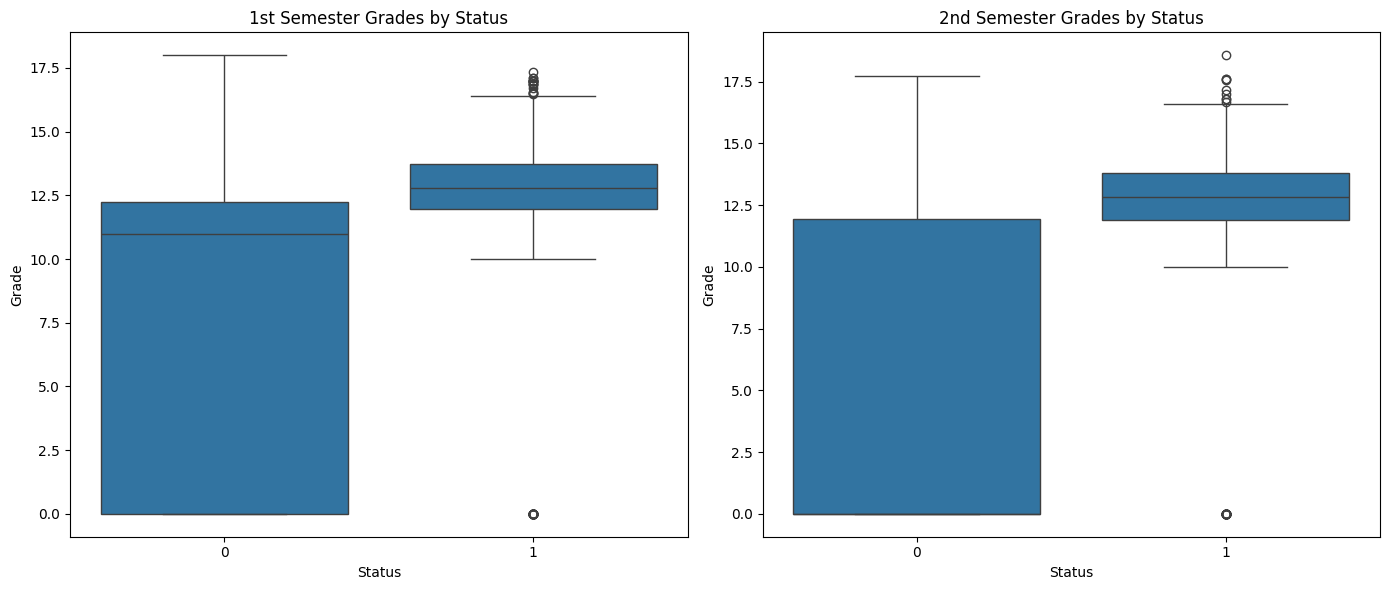

In [61]:
# Analisisi hubungunan antara performa akademik dengan status dropout
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Status', y='Curricular_units_1st_sem_grade', data=new_df)
plt.title('1st Semester Grades by Status')
plt.xlabel('Status')
plt.ylabel('Grade')

plt.subplot(1, 2, 2)
sns.boxplot(x='Status', y='Curricular_units_2nd_sem_grade', data=new_df)
plt.title('2nd Semester Grades by Status')
plt.xlabel('Status')
plt.ylabel('Grade')

plt.tight_layout()
plt.show()

**Korelasi Fitur Numerik**

Text(0.5, 1.0, 'Korelasi Untuk Fitur Numerik')

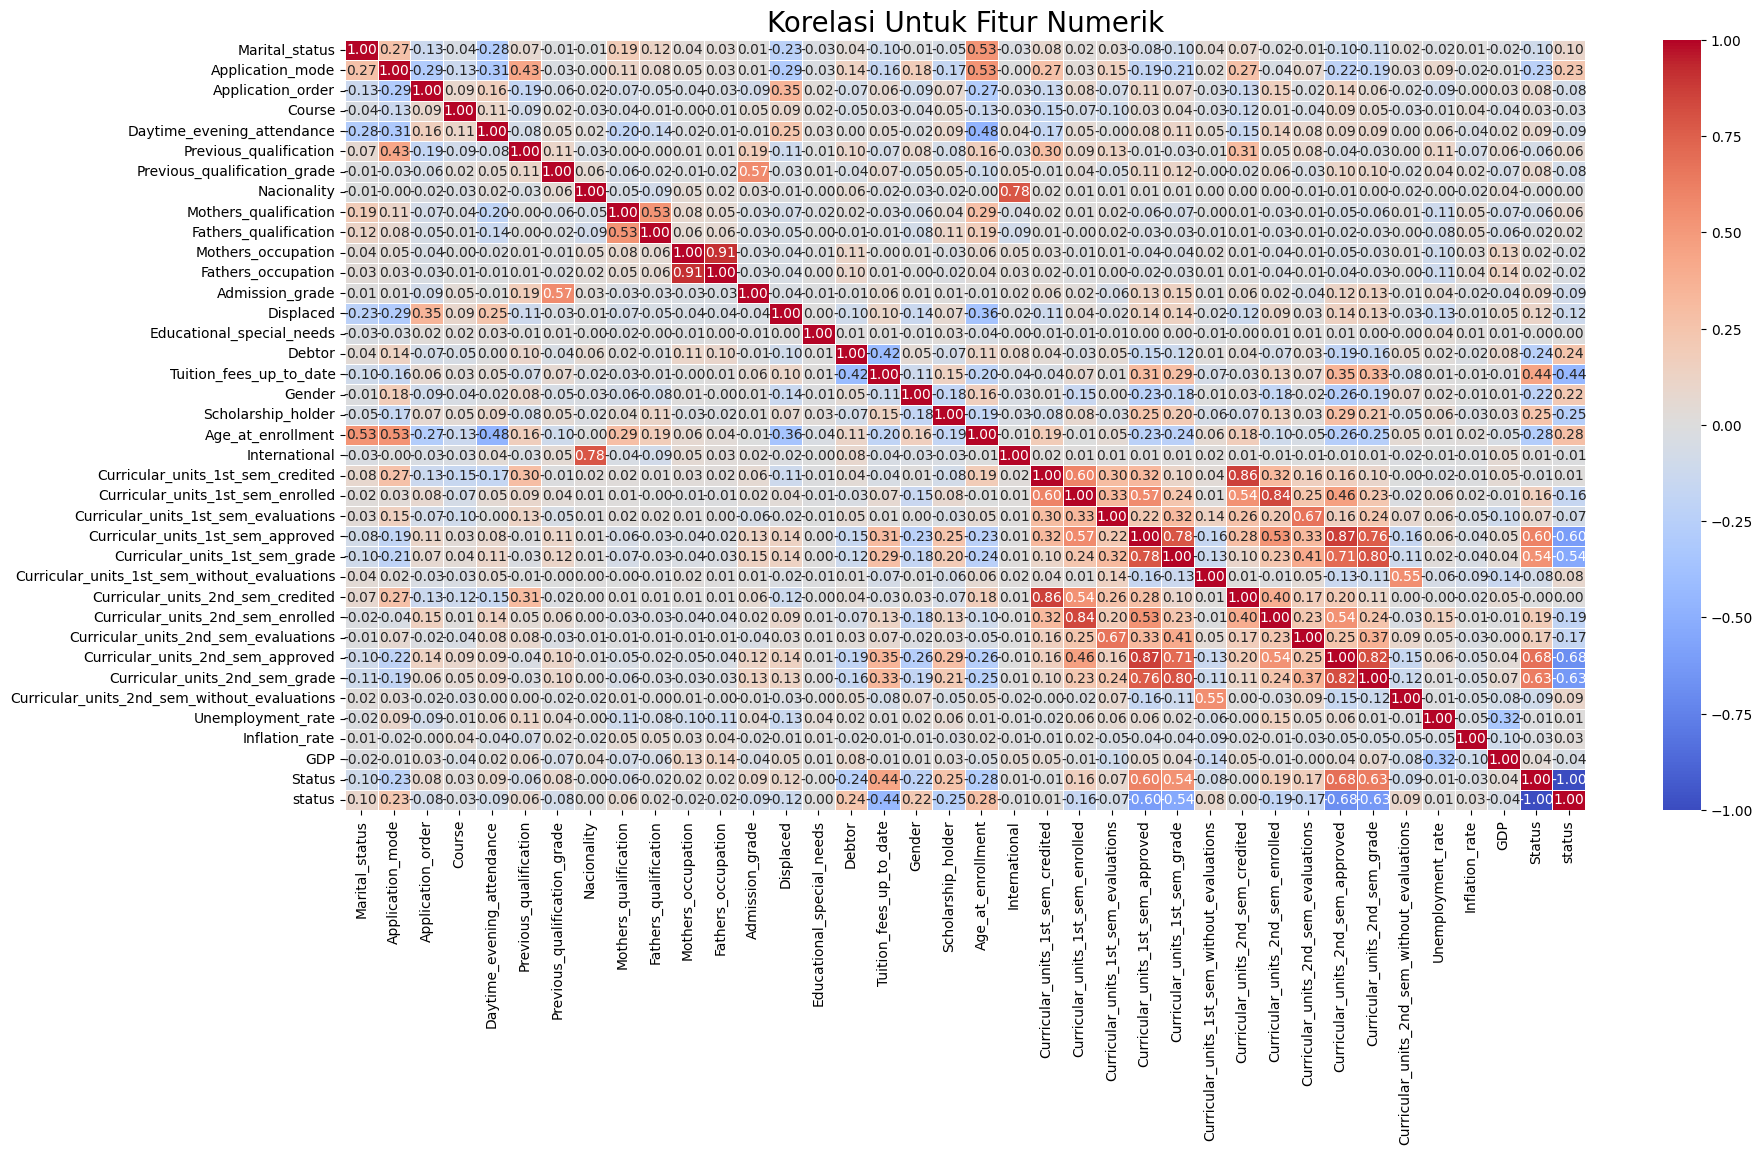

In [62]:
plt.figure(figsize=(20, 10))
sns.heatmap(data=new_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Korelasi Untuk Fitur Numerik", size=20)

In [63]:
new_df.corrwith(new_df['Status']).sort_values(ascending=False)

,0
Status,1.000000
Curricular_units_2nd_sem_approved,0.681053
Curricular_units_2nd_sem_grade,0.632688
Curricular_units_1st_sem_approved,0.603617
Curricular_units_1st_sem_grade,0.538662
Tuition_fees_up_to_date,0.441792
Scholarship_holder,0.253533
Curricular_units_2nd_sem_enrolled,0.191289
Curricular_units_2nd_sem_evaluations,0.168743
Curricular_units_1st_sem_enrolled,0.156395


pada hasil korelasi, terdapat 10 fitur tertinggi yang dapat dijadikan sebagai fitur untuk pelatihan model :

- Curricular_units_2nd_sem_approved
- Circular_units_2nd_sem_grade
- Curricular_units_1st_sem_approved
- Curricular_units_1st_sem_grade
- Tuition_fees_up_to_date
- Scholarship_holder
- Curricular_units_2nd_sem_enrolled
- Curricular_units_2nd_sem_evaluations
- Curricular_units_1st_sem_enrolled
- Displaced

# Modeling

Pada tahap modeling ini akan dilakukan pemilihan data untuk inputan, dan data splitting untuk training dan testing. untuk targetnya sendiri sekarang akan terbatas pada Graduate & Dropout. serta di akhir kita akan melakukan pembuatan model menggunakan algoritma neural network.

In [64]:
# mempersiapkan variable untuk digunakan prediksi
selected_df = new_df[[
   "Curricular_units_2nd_sem_approved",
   "Curricular_units_2nd_sem_grade",
   "Curricular_units_1st_sem_approved",
   "Curricular_units_1st_sem_grade",
   "Tuition_fees_up_to_date",
   "Scholarship_holder",
   "Curricular_units_2nd_sem_enrolled",
   "Curricular_units_1st_sem_enrolled",
   "Curricular_units_2nd_sem_evaluations",
   "Displaced", "Status",
]]

In [65]:
selected_df.head()

,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Tuition_fees_up_to_date,Scholarship_holder,Curricular_units_2nd_sem_enrolled,Curricular_units_1st_sem_enrolled,Curricular_units_2nd_sem_evaluations,Displaced,Status
1,6,13.666667,6,14.000000,0,0,6,6,6,1,1
2,0,0.000000,0,0.000000,0,0,6,6,0,1,0
3,5,12.400000,6,13.428571,1,0,6,6,10,1,1
4,6,13.000000,5,12.333333,1,0,6,6,6,0,1
6,8,14.345000,7,13.300000,1,1,8,7,8,1,1


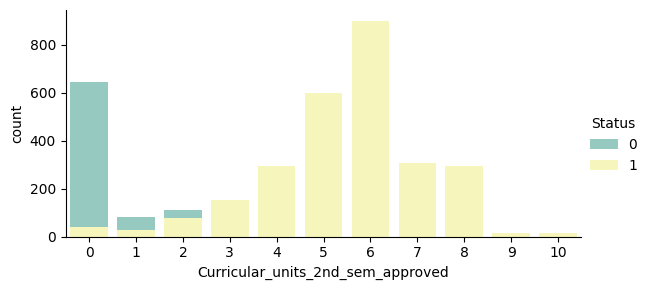

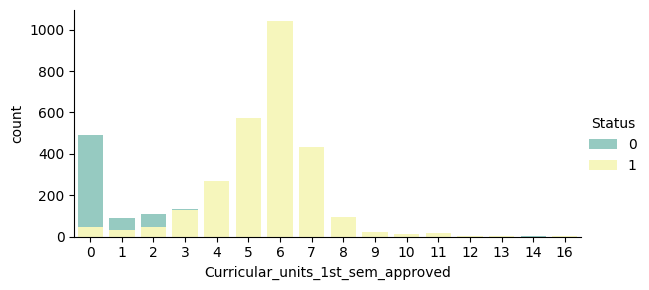

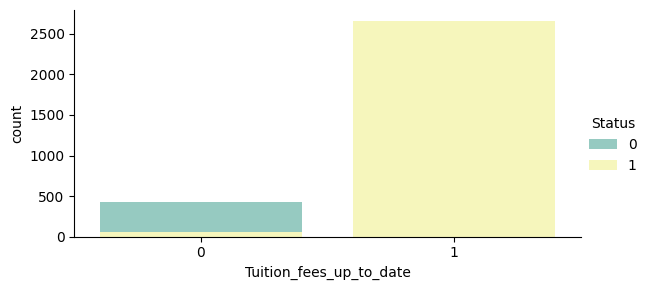

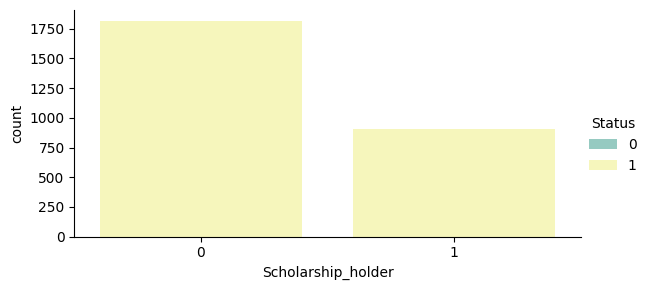

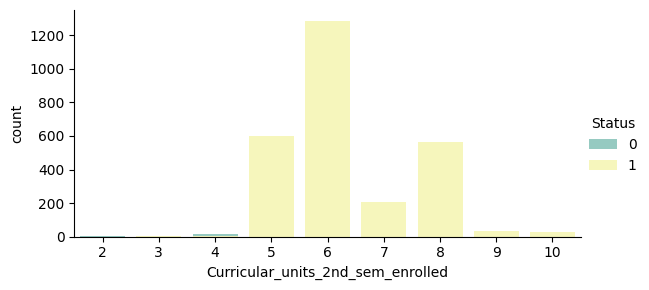

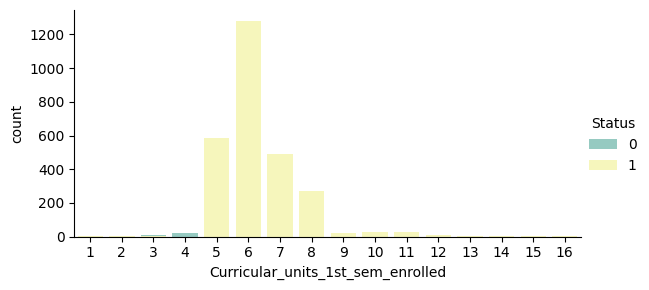

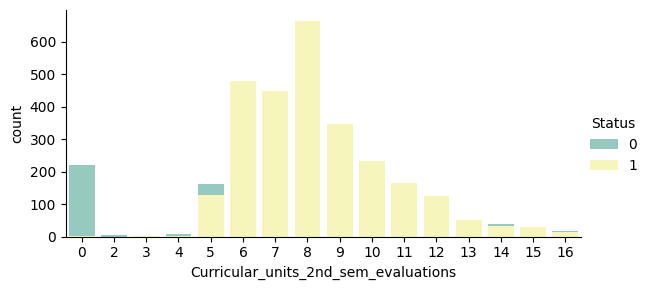

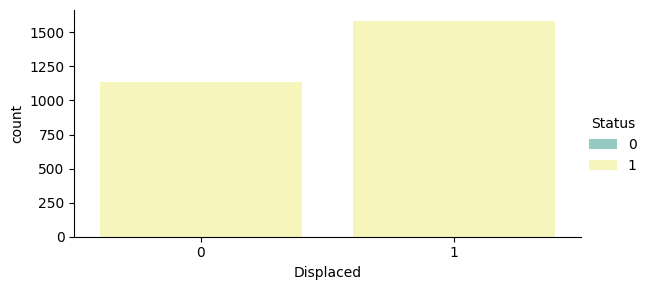

In [66]:
for column in selected_df.columns.drop(['Status', 'Curricular_units_2nd_sem_grade', 'Curricular_units_1st_sem_grade']):
  sns.catplot(x=column, kind='count', dodge=False, palette="Set3", hue='Status', height=3, aspect=2, data=selected_df)
  plt.xlabel(column.capitalize())
  # plt.xticks(rotation=45)
  plt.show()
  print("\n")

In [67]:
selected_df.to_csv("cleaned.csv", index=False)

In [68]:
selected_df.describe()

,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Tuition_fees_up_to_date,Scholarship_holder,Curricular_units_2nd_sem_enrolled,Curricular_units_1st_sem_enrolled,Curricular_units_2nd_sem_evaluations,Displaced,Status
count,4004.000000,4004.000000,4004.000000,4004.000000,4004.000000,4004.000000,4004.000000,4004.000000,4004.000000,4004.000000,4004.000000
mean,4.327173,10.567570,4.536464,11.006262,0.879121,0.256494,6.199301,6.165834,7.935814,0.542458,0.679820
std,2.547348,4.965581,2.419407,4.515830,0.326027,0.436752,1.123740,1.217317,3.038618,0.498256,0.466604
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,3.000000,11.000000,3.000000,11.250000,1.000000,0.000000,5.000000,5.000000,6.000000,0.000000,0.000000
50%,5.000000,12.333333,5.000000,12.333333,1.000000,0.000000,6.000000,6.000000,8.000000,1.000000,1.000000
75%,6.000000,13.428571,6.000000,13.443254,1.000000,1.000000,7.000000,7.000000,10.000000,1.000000,1.000000
max,10.000000,18.571429,16.000000,18.000000,1.000000,1.000000,10.000000,16.000000,16.000000,1.000000,1.000000


In [69]:
# bagi data latih dan data uji
x = selected_df.drop(['Status'], axis=1)
y = selected_df['Status']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [70]:
x_train

,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Tuition_fees_up_to_date,Scholarship_holder,Curricular_units_2nd_sem_enrolled,Curricular_units_1st_sem_enrolled,Curricular_units_2nd_sem_evaluations,Displaced
2572,6,14.166667,6,12.625000,1,0,6,6,6,0
2556,5,11.400000,4,12.000000,1,0,5,5,6,0
2302,2,11.000000,5,10.666667,1,1,5,5,11,0
3304,6,13.833333,6,14.666667,1,1,6,6,6,0
3634,4,12.750000,4,12.750000,1,0,5,5,6,0
...,...,...,...,...,...,...,...,...,...,...
4234,4,11.250000,3,10.500000,1,0,5,5,10,1
1186,10,12.968182,11,12.700000,1,0,10,11,12,1
4399,6,14.333333,6,13.875000,1,1,6,6,6,1
254,5,10.800000,5,12.400000,1,0,5,5,6,0


In [71]:
print(f"Total data latih : {len(x_train)}")
print(f"Total data uji : {len(x_test)}")

Total data latih : 3203
Total data uji : 801


In [73]:
nn_classifier = MLPClassifier(hidden_layer_sizes=10,
                              activation='relu',
                              n_iter_no_change=30,
                              solver='adam')
nn_classifier.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=10, n_iter_no_change=30)

In [75]:
joblib.dump(nn_classifier, 'student_dropout_model.joblib')

['student_dropout_model.joblib']

# Evaluation

Akurasi : 0.885143570536829
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       263
           1       0.89      0.95      0.92       538

    accuracy                           0.89       801
   macro avg       0.88      0.85      0.87       801
weighted avg       0.88      0.89      0.88       801



Text(0.5, 1.0, 'Confusion Matrix')

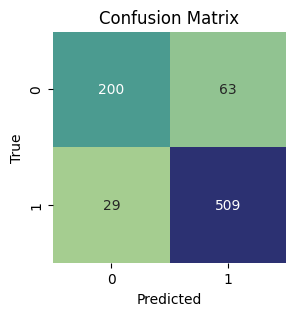

In [76]:
# akurasi
predict = nn_classifier.predict(x_test)

accuracy = accuracy_score(y_test, predict)
print(f"Akurasi : {accuracy}")

# classification report
class_report = classification_report(y_test, predict)
print(class_report)

# konfusion matriks
conf = confusion_matrix(y_test, predict)

plt.figure(figsize=(3,3))
sns.heatmap(conf, annot=True, fmt='d', cmap='crest', cbar=False)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Model Inference

In [77]:
data_to_predict = {
   "Curricular_units_2nd_sem_approved": 7,
   "Curricular_units_2nd_sem_grade": 12,
   "Curricular_units_1st_sem_approved" : 2,
   "Curricular_units_1st_sem_grade": 10,
   "Tuition_fees_up_to_date": 1,
   "Scholarship_holder": 0,
   "Curricular_units_2nd_sem_enrolled": 3,
   "Curricular_units_1st_sem_enrolled": 7,
   "Curricular_units_2nd_sem_evaluations": 10,
   "Displaced": 1
}

data_predict_df = pd.DataFrame(data_to_predict, index=[0])

In [85]:
result = nn_classifier.predict_proba(data_predict_df)


label = ['Dropout', 'No Dropout']
print("Probability", result)
print(f"Result : {label[np.argmax(result)]}")

Probability [[0.06283676 0.93716324]]
Result : No Dropout


In [86]:
res = nn_classifier.predict(data_predict_df)
label[np.argmax(res)]

'Dropout'